# Pair Trading With Cryptocurrencies

## How To Implement A Pair Trading Strategy Using Python

## Introduction
...

Import packages

In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [5]:
import pickle

In [4]:
import matplotlib.pyplot as plt

In [90]:
import statsmodels.api as sm

In [6]:
%matplotlib inline

## Data Preparation

Load data

In [8]:
with open('data_bitfinex.pickle', 'rb') as f:
    data = pickle.load(f)
    
f.close()

Collect tickers

In [43]:
tickers = list(data.columns.levels[0])

In [44]:
tickers

['BCCUSD',
 'BCUUSD',
 'BTCUSD',
 'DSHUSD',
 'EOSUSD',
 'ETCUSD',
 'ETHUSD',
 'LTCUSD',
 'RRTUSD',
 'SANUSD',
 'XMRUSD',
 'XRPUSD',
 'ZECUSD']

Create a dictionary of last prices

In [51]:
last_dict = {}

In [52]:
for i in tickers:
    last_dict[i] = data[i].Last

Convert dictionary of last prices to DataFrame

In [55]:
last = pd.DataFrame(last_dict)

Check

In [59]:
last.head()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,,,,,
2017-05-19,1787.6,201.30,1970.0,98.028,NaN,7.4993,125.79,26.824,0.090696,NaN,31.498,0.31800,105.84
2017-05-20,1820.0,193.85,2068.0,102.450,NaN,7.1010,126.30,27.467,0.090696,NaN,35.342,0.34689,106.75
2017-05-21,1753.0,200.15,2037.9,102.010,NaN,7.6000,144.40,26.050,0.088110,NaN,34.140,0.33345,117.71
2017-05-22,1850.0,200.00,1981.9,115.020,NaN,7.9482,137.00,23.291,0.089990,NaN,34.889,0.28001,194.10
2017-05-23,2000.0,214.53,2228.0,132.250,NaN,9.9974,167.02,29.750,0.092496,NaN,53.326,0.32090,250.00


In [60]:
last.tail()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,,,,,
2019-05-19,NaN,NaN,8174.8,164.46,6.477079,7.8201,261.43,96.002,0.043800,1.02730,89.805,0.42290,77.911
2019-05-20,NaN,NaN,7914.4,167.43,6.242500,7.3603,250.53,90.967,0.043700,0.97400,86.704,0.39650,75.697
2019-05-21,NaN,NaN,7966.9,166.99,6.301800,7.4557,256.60,91.729,0.042301,0.96700,89.026,0.39900,75.178
2019-05-22,NaN,NaN,7729.7,155.95,5.964400,6.9617,245.78,88.645,0.042270,0.98555,84.304,0.37734,70.679
2019-05-23,NaN,NaN,7891.3,154.52,6.064500,7.0569,246.10,89.251,0.042270,0.93645,84.664,0.38003,71.724


In [61]:
last.describe()

,BCCUSD,BCUUSD,BTCUSD,DSHUSD,EOSUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,SANUSD,XMRUSD,XRPUSD,ZECUSD
count,215.000000,215.000000,712.000000,712.000000,483.000000,712.000000,712.000000,711.000000,711.000000,472.000000,712.000000,712.000000,711.000000
mean,4797.132093,292.164488,6297.287691,287.632192,3.683205,14.281943,368.428862,84.798965,0.078213,0.602140,125.295864,0.468881,205.455135
std,3809.541788,156.675981,3046.770749,231.953919,2.227089,8.135075,254.802203,58.395382,0.056773,0.662396,88.610652,0.364259,132.558672
min,1345.000000,64.000000,1949.900000,59.512000,0.488800,3.452200,85.039000,21.845000,0.033010,0.145010,29.744000,0.148210,47.051000
25%,2398.300000,192.970000,3965.200000,132.195000,1.788650,7.451100,178.225000,46.686500,0.040348,0.310993,53.109000,0.261860,85.598500
50%,3500.000000,230.010000,6284.350000,202.760000,3.590000,13.954500,292.545000,61.000000,0.056213,0.456895,101.530000,0.335150,191.270000
75%,5310.600000,387.550000,7681.375000,348.690000,5.395750,17.399750,471.400000,100.087500,0.085495,0.629570,161.325000,0.525350,270.150000
max,19433.000000,810.000000,19210.000000,1424.600000,11.491000,42.416000,1380.000000,355.510000,0.372000,4.642000,470.990000,2.760400,753.570000


Drop cryptocurrencies which have less than 2y data

In [63]:
last.drop(['BCCUSD', 'BCUUSD', 'EOSUSD', 'SANUSD'], axis='columns', inplace=True)

Check

In [64]:
last.describe()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
count,712.000000,712.000000,712.000000,712.000000,711.000000,711.000000,712.000000,712.000000,711.000000
mean,6297.287691,287.632192,14.281943,368.428862,84.798965,0.078213,125.295864,0.468881,205.455135
std,3046.770749,231.953919,8.135075,254.802203,58.395382,0.056773,88.610652,0.364259,132.558672
min,1949.900000,59.512000,3.452200,85.039000,21.845000,0.033010,29.744000,0.148210,47.051000
25%,3965.200000,132.195000,7.451100,178.225000,46.686500,0.040348,53.109000,0.261860,85.598500
50%,6284.350000,202.760000,13.954500,292.545000,61.000000,0.056213,101.530000,0.335150,191.270000
75%,7681.375000,348.690000,17.399750,471.400000,100.087500,0.085495,161.325000,0.525350,270.150000
max,19210.000000,1424.600000,42.416000,1380.000000,355.510000,0.372000,470.990000,2.760400,753.570000


Plot

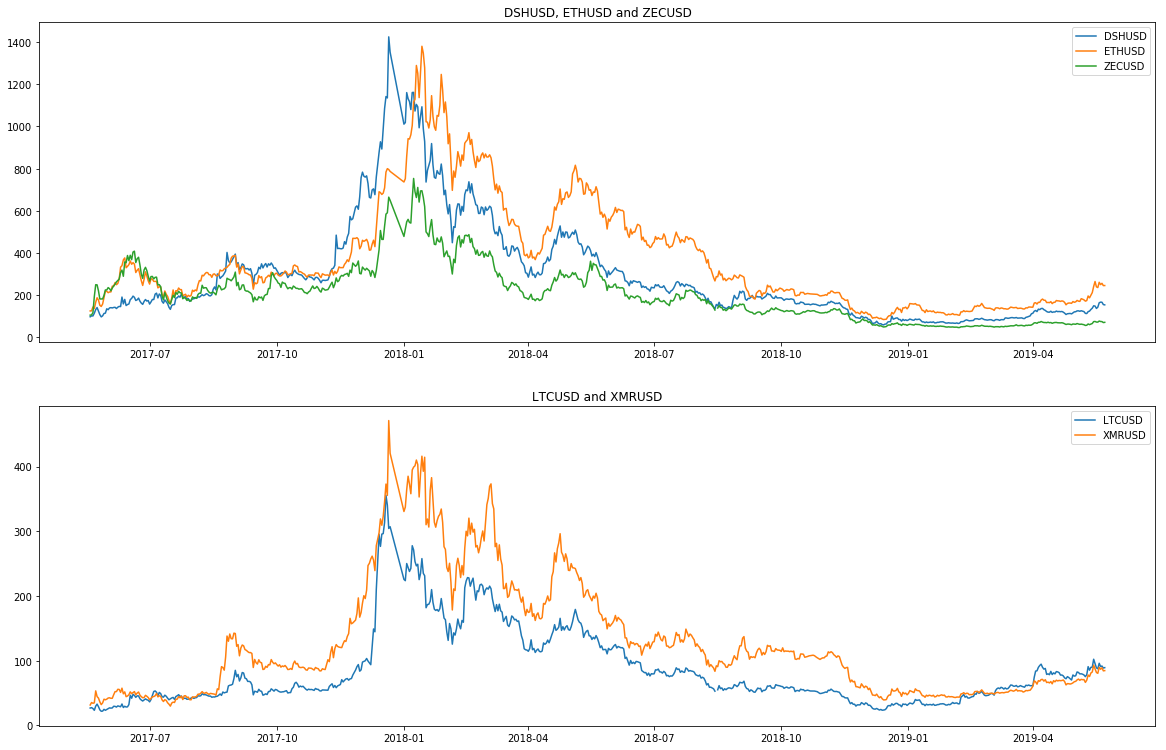

In [100]:
# Adjust plot size
plt.figure(figsize=(20, 20))


plt.subplot(3, 1, 1)
# DSHUSD, ETHUSD and ZECUSD
plt.plot(last['DSHUSD'])
plt.plot(last['ETHUSD'])
plt.plot(last['ZECUSD'])
# Title
plt.title('DSHUSD, ETHUSD and ZECUSD')
# Legend
plt.legend(['DSHUSD', 'ETHUSD', 'ZECUSD'])

plt.subplot(3, 1, 2)
# LTCUSD and XMRUSD
plt.plot(last['LTCUSD'])
plt.plot(last['XMRUSD'])
# Title
plt.title('LTCUSD and XMRUSD')
# Legend
plt.legend(['LTCUSD', 'XMRUSD'])

## Pair Trading Strategy

### Training Set

Define the training set

In [85]:
training_set = last.loc[:'2017-12-22']

Check

In [86]:
training_set.head()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,
2017-05-19,1970.0,98.028,7.4993,125.79,26.824,0.090696,31.498,0.31800,105.84
2017-05-20,2068.0,102.450,7.1010,126.30,27.467,0.090696,35.342,0.34689,106.75
2017-05-21,2037.9,102.010,7.6000,144.40,26.050,0.088110,34.140,0.33345,117.71
2017-05-22,1981.9,115.020,7.9482,137.00,23.291,0.089990,34.889,0.28001,194.10
2017-05-23,2228.0,132.250,9.9974,167.02,29.750,0.092496,53.326,0.32090,250.00


In [87]:
training_set.tail()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
Date,,,,,,,,,
2017-12-18,18959.0,1085.0,33.987,708.78,313.50,0.28890,345.41,0.70932,527.91
2017-12-19,18925.0,1141.6,38.001,784.00,355.51,0.27199,372.91,0.75624,584.61
2017-12-20,17340.0,1135.2,37.418,800.00,340.35,0.25800,355.37,0.72900,591.02
2017-12-21,16425.0,1424.6,38.999,795.91,304.31,0.25148,470.99,0.71395,665.00
2017-12-22,15650.0,1352.1,37.181,786.99,306.97,0.24000,420.42,1.11940,649.99


In [88]:
training_set.describe()

,BTCUSD,DSHUSD,ETCUSD,ETHUSD,LTCUSD,RRTUSD,XMRUSD,XRPUSD,ZECUSD
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,5207.076193,322.526465,16.475827,313.134279,64.731758,0.129734,97.278935,0.242957,261.156093
std,3784.299130,223.402565,5.760548,113.899267,55.993577,0.062390,74.558226,0.119014,81.759324
min,1949.900000,97.592000,7.101000,125.790000,21.845000,0.037999,29.744000,0.148210,105.840000
25%,2652.400000,181.520000,12.946500,257.315000,43.119000,0.078340,45.698500,0.193090,212.900000
50%,4162.600000,284.190000,15.552000,297.400000,51.593000,0.112500,86.852000,0.217850,238.590000
75%,5899.550000,342.435000,17.603500,334.825000,62.580000,0.153495,115.000000,0.252215,290.000000
max,19210.000000,1424.600000,38.999000,800.000000,355.510000,0.372000,470.990000,1.119400,665.000000


### The Hedge Ratio

#### DSHUSD and ETHUSD

Model $$ DSHUSD = HedgeRatio * ETHUSD $$

In [102]:
model = sm.OLS(training_set['DSHUSD'], training_set['ETHUSD'])

In [104]:
result = model.fit()

In [106]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DSHUSD   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     2055.
Date:                Fri, 24 May 2019   Prob (F-statistic):          1.10e-111
Time:                        17:41:15   Log-Likelihood:                -1335.1
No. Observations:                 215   AIC:                             2672.
Df Residuals:                     214   BIC:                             2676.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ETHUSD         1.1200      0.025     45.331      0.000       1.071       1.169
==============================================================================
Omnibus:                       73.344   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.247
Skew:                           1.488   Prob(JB):                     1.99e-44
Kurtosis:                       6.689   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Set the hedge ratio

In [108]:
hedge_ratio = result.params['ETHUSD']

Plot

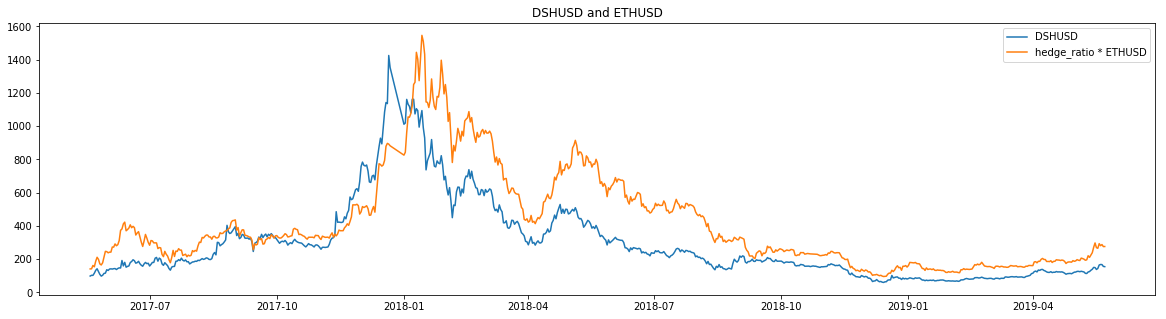

In [123]:
# Adjust plot size
plt.figure(figsize=[20, 5])

plt.plot(last['DSHUSD'])
plt.plot(hedge_ratio * last['ETHUSD'])

# Title
plt.title('DSHUSD and ETHUSD')

# Legend 
plt.legend(['DSHUSD', 'hedge_ratio * ETHUSD'])

Calculate the spread

In [124]:
spread = last['DSHUSD'] - hedge_ratio * last['ETHUSD']

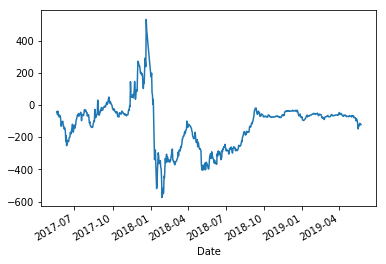

In [126]:
spread.plot()

Mean of the spread on the training set

In [130]:
spread_mean = spread[:'2017-12-22'].mean()

In [131]:
spread_mean

-28.193228611132398

Standard deviation of the spread on the training set

In [132]:
spread_std = spread[:'2017-12-22'].std()

In [133]:
spread_std

117.32947761504481

z-score

In [134]:
z_score = (spread - spread_mean) / spread_std

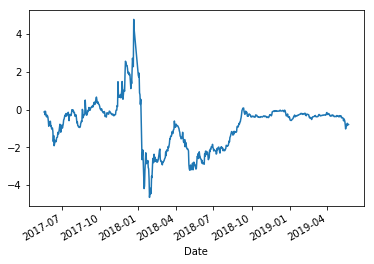

In [136]:
z_score.plot()

### Trading Strategy

## Conclusion
...